<a href="https://colab.research.google.com/github/starkjones/Food-Sales-Predictions-/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales-Prediction
### Week 1-5: Python for Data Science
Jonthan Jones 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
sales_data = '/content/drive/MyDrive/Colab Notebooks/Week 1/sales_predictions.csv'
df = pd.read_csv(sales_data)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
# Making a copy of the original dataframe for machine learning

df_ML = df.copy(deep=True)

In [7]:
# 1. How many rows and columns?

df.shape 

# (8523 rows, 12 columns)

(8523, 12)

In [8]:
# 2.  What are the datatypes of each variable?

df.info()
 # Index  Column Name                Non-Null Count  Dtype                     
 # 0      Item_Identifier            8523 non-null   object 
 # 1      Item_Weight                7060 non-null   float64
 # 2      Item_Fat_Content           8523 non-null   object 
 # 3      Item_Visibility            8523 non-null   float64
 # 4      Item_Type                  8523 non-null   object 
 # 5      Item_MRP                   8523 non-null   float64
 # 6      Outlet_Identifier          8523 non-null   object 
 # 7      Outlet_Establishment_Year  8523 non-null   int64  
 # 8      Outlet_Size                6113 non-null   object 
 # 9      Outlet_Location_Type       8523 non-null   object 
 # 10     Outlet_Type                8523 non-null   object 
 # 11     Item_Outlet_Sales          8523 non-null   float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# 3. Are there duplicates? If so, drop any duplicates.

# df.duplicated()
df.duplicated().sum()

# No duplicates present

0

In [10]:
# 4. Identify missing values.

df.isna().sum()
# Item Weight is missing 1463 values and Outlet Size is missing 2410

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# 5. Decide on how to address the missing values and do it! 
# (This requires your judgement, so explain your choice).

# Item Weight (float64): 1463/8523 = 17% of values missing
# Outlet Size (object): 2410/8523 = 28% of values missing 

# Neither column is close to missing 50% of data,  
# the industry-accepted threshhold for removal justifcation 

# Therefore the missing values in Item weight will be replaced with 
# the column's mean since its data type is float

IW_mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(IW_mean, inplace=True)
df['Item_Weight'].value_counts()

# Missing Outlet Size data will be replaced with the most common entry:

df['Outlet_Size'].fillna("Medium", inplace=True)
df['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
 # 6. Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, 
# and cats so that they are consistent) 
# Answer: Checking all columns with object datatypes:

dtypes = df.dtypes
str_columns = dtypes[dtypes=='object'].index
str_columns

for column in str_columns:
  print(f"Column Name = {column}")
  print()
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = Item_Identifier

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



Column Name = Item_Fat_Content

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



Column Name = Item_Type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



Column Name = Outlet_Identifier

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT03

In [14]:
# The for loop prints what I assume are 3 
# different versions of "Low Fat", and two different versions of "Regular" 
# as seen below:

# Low Fat    5089
# Regular    2889
# LF          316
# reg         117
# low fat     112
# Name: Item_Fat_Content, dtype: int64

df['Item_Fat_Content'].replace({"LF":"Low Fat", "low fat": "Low Fat", 
                                "reg": "Regular"}, inplace= True)
df["Item_Fat_Content"].value_counts()

# Item_Type = No inconsistencies 
# Outlet_Identifier = No inconsistencies
# Outlet_Size = No inconsistencies
# Outlet_Location_Type = No inconsistencies
# Outlet_Type = No inconsistencies

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

# Summary stats for all numeric columns

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df["Item_MRP"].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

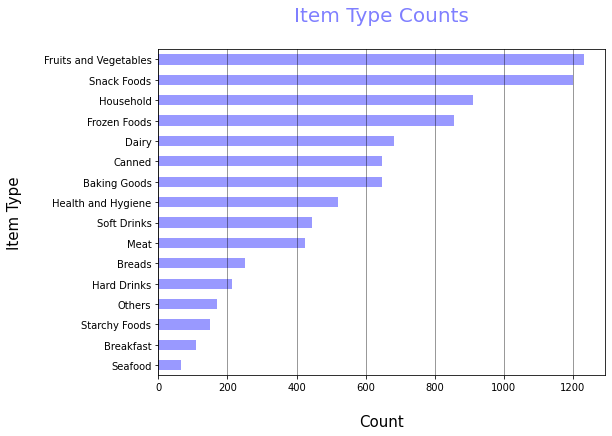

In [17]:
groceries = df['Item_Type'].value_counts().sort_values(ascending=True)

groceries.plot(kind='barh', alpha = .4, color='blue', figsize= (8,6), );
plt.title('Item Type Counts\n', alpha= .5, color= 'blue', fontsize =20)
plt.xlabel('\nCount', fontsize = 15)
plt.ylabel('Item Type\n', fontsize = 15)
plt.grid(axis ='x', color ='black', alpha=.5)
plt.show()

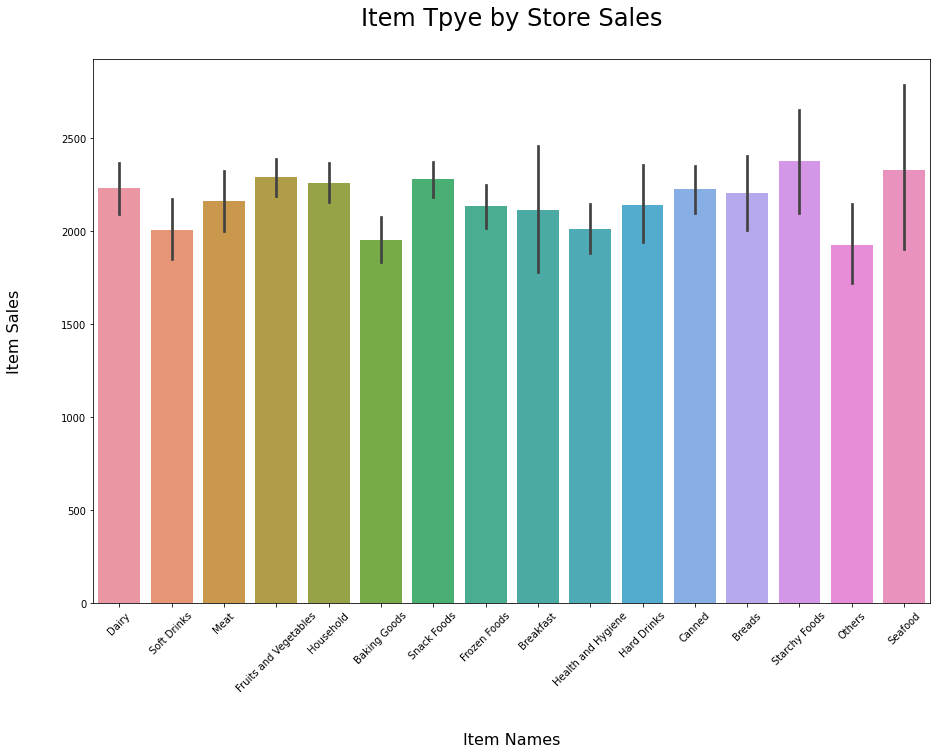

In [18]:
fig, bp = plt.subplots(nrows=1, ncols =1, figsize= (15,10))
bp = sns.barplot(data=df, x= 'Item_Type', y = 'Item_Outlet_Sales');
plt.title('Item Tpye by Store Sales\n', fontsize =24)
plt.ylabel('Item Sales\n\n', fontsize=16);
plt.xlabel('\n\nItem Names', fontsize=16);
plt.xticks(rotation=45);

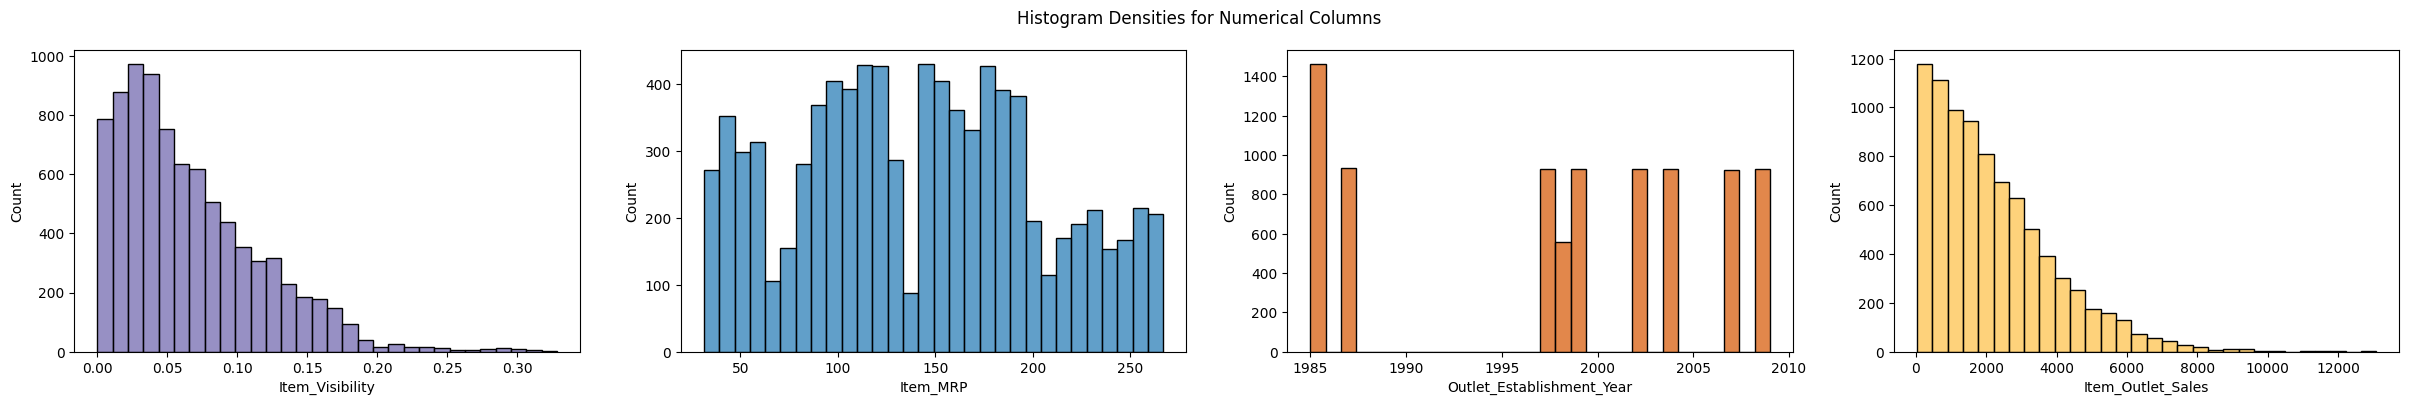

In [19]:
# Histogram to view the distributions of various features in your dataset. 

IV = df['Item_Visibility']         
IMRP = df['Item_MRP']                   
OEY = df['Outlet_Establishment_Year']  
IOS = df['Item_Outlet_Sales']         

fig, axes = plt.subplots(1, 4,figsize=(30,4), sharey=False, dpi=100);
plt.suptitle('Histogram Densities for Numerical Columns')
sns.histplot(IV, bins=30, color="#756bb1", ax=axes[0], legend=True, linestyle='solid', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(IMRP, bins=30, color="#2c7fb8", ax=axes[1], legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(OEY, bins=30, color="#d95f0e", ax=axes[2], legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});
sns.histplot(IOS, bins=30, color="#fec44f", ax=axes[3], legend=True, linestyle='-', line_kws={'lw': 2, 'color': 'black'});

# Interpretation: From the distribution graphs:

# Item Visibility: Item Visibility counts are highest with scores close to zero 
#and linearly decline as the scores increase.

# Item MRP: Item Material Requirements Planning has a pseudo symmetrical 
# distribution that is mirrored on the axis of x = 140. 

# Outlet Establishment Year: Store establishment was high in the late 80s, and 
# non-existent from the early to mid-90s, before tapering off at 800+ 
# store every few years from the late 90s to early 2000s. With the exception of 
# ~1987 – 1997 stores establishment appears to be consistent # every few years. 

# Item Outlet Sales: The size of sales to various outlet stores is spans in the 
#0 – 13,000.00-dollar range with most sales occurring around 2,000.00 dollars. 



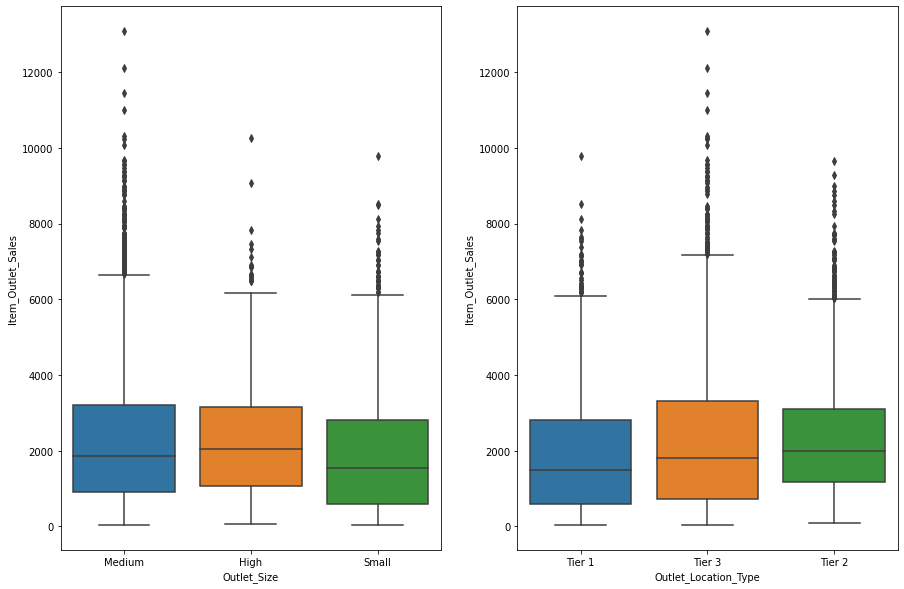

In [20]:
# Boxplot to view statistical summaries of various features in your dataset.
fig, axes = plt.subplots(nrows=1, ncols =2, figsize= (15,10))
sns.boxplot(data= df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0]);
sns.boxplot(data= df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[1]);

# Interpretation:
# Graph 1: 
# Medium store sizes buy the most items and have a higher upper quartile, maximum, and average than the High and Small outlet sizes. 
# High outlets have the highest average buys and a slightly higher upper quartile over the Small outlets, although their maximums appear to be equivalent. 
# Smaller outlets have the second highest number of outliers beyond their maximum purchases. 

# Medium Stores have the highest number of purchases and the largest by far. 

# Graph 2:
# Tier 3 location stores have the largest number of purchases and the highest purchase orders. 

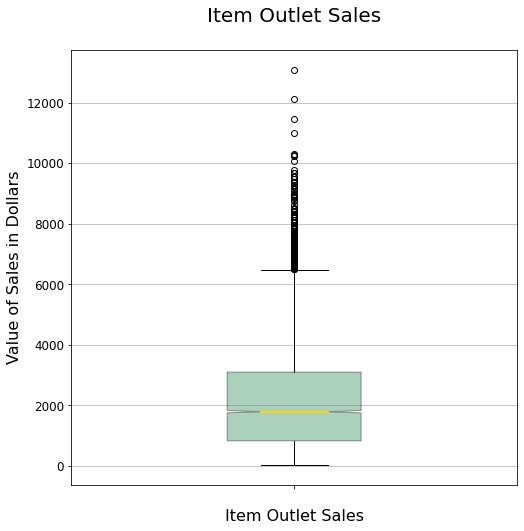

In [21]:
fig, bp = plt.subplots(nrows =1, ncols =1, figsize = (8,8))

bp.boxplot([df['Item_Outlet_Sales'], ], notch = True, labels=[' '],
                        widths= .3, 
                        patch_artist=True, 
                        medianprops=dict(linestyle='-', linewidth =2, color='gold'), 
                        boxprops=dict(linestyle='--', color='Black', facecolor='seagreen', alpha=.4));
bp.set_title('Item Outlet Sales\n', fontsize = 20);
plt.xlabel('Item Outlet Sales', fontsize=16)
plt.ylabel('Value of Sales in Dollars', fontsize = 16);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.grid(axis='y',c = '#756bb1', alpha = .5)

# Interpretation:
# Mean outlet sales are estimated to be around $2000.00 with a 95% confidence 
# interval.The majority of sales are within the range of  $1000.00-$3000.00 with 
# max sales above $6000.00 and several outliers that span 6200.00 to 13,000.00 dollars. 

In [22]:
# Heatmap of the correlation between features.
correlation = df.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


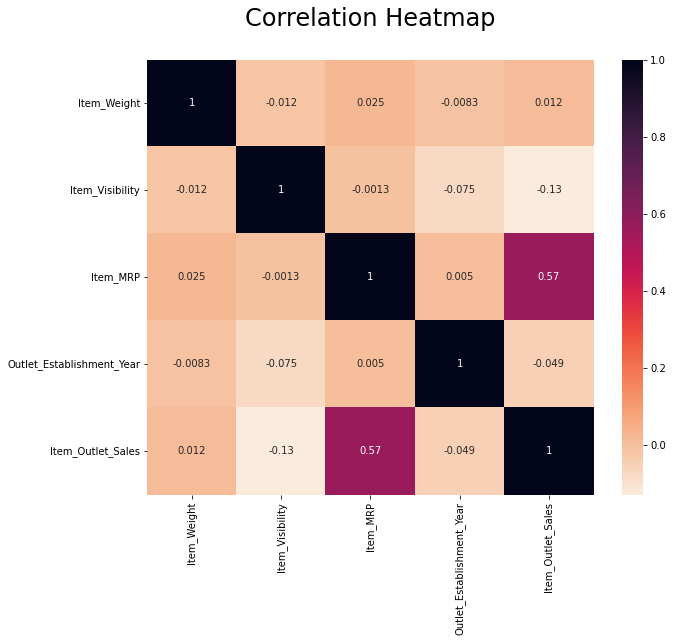

In [23]:
fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(10,8));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

# Interpretation: ItemMRP and Item Outlet Sales have the highest  positive 
# correlation and Item Visibility and Item Outlet Sales have the strongest negative correlation.

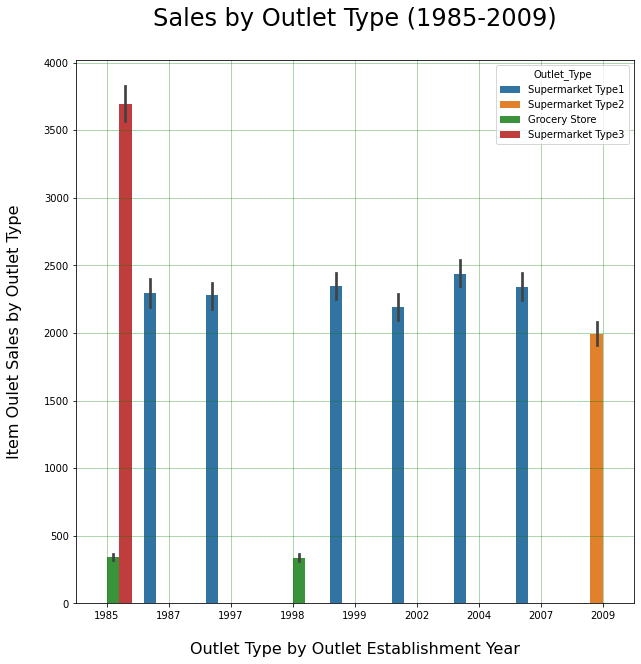

In [24]:
# For Part 4, your task is to build several data visualizations to help your 
# stakeholders better understand trends in the data. 
# Feel free to get creative with this week - this is your chance to set your 
# project apart from others with exceptional visualizations and analyses.

# Build on your previous cleaning, exploration, and analysis.  
# Create a minimum of two data visualizations that help others understand 
# trends in the data (explanatory data analysis).
# Since these graphs are for reporting purposes, 
#make sure they look nice by including titles, legends, etc.

fig, bar = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
bar = sns.barplot(data=df, x = df["Outlet_Establishment_Year"], y = df['Item_Outlet_Sales'], hue= df['Outlet_Type']);
bar.set_title('Sales by Outlet Type (1985-2009)\n', fontsize =24);
plt.xlabel('\nOutlet Type by Outlet Establishment Year', fontsize= 16);
plt.ylabel('Item Oulet Sales by Outlet Type\n', fontsize=16);
plt.grid(c ='green', alpha=.4, linestyle='-')

# Interpretation:
# It appears that sales were no longer made to Supermarket Type 3 after 1986-1987: These types of stores may have gone out of business, or they are no longer clients. 
# Supermarket Type 2 stores are established in 2008 and /or they have become new clients in that year. 
# Sales to Grocery Stores were conducted in 1986 and 1999 only. 
#Supermarket Type 1 has been the most consistent buyer throughout the decades. 

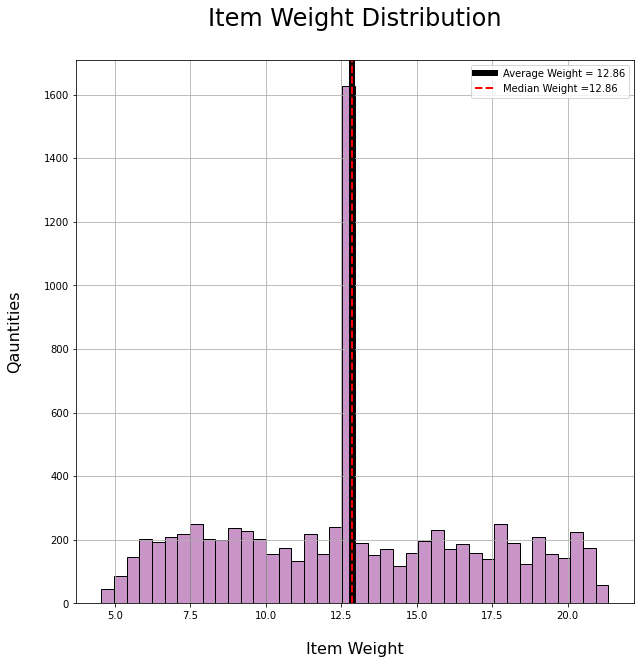

In [25]:
IW_mean = df["Item_Weight"].mean()
IW_median = df["Item_Weight"].median()

ax = df['Item_Weight'].hist(bins=40, color=["#c994c7"], edgecolor="black", figsize=[10,10], );
ax.axvline(IW_mean, color='k', ls='solid', lw=6, label= f"Average Weight = {round(IW_mean, 2)}")
ax.axvline(IW_median, color="red", ls='--', lw= 2, label= f"Median Weight ={IW_median:,.2f}");
ax.legend();
plt.xlabel("\nItem Weight", fontsize=16);
plt.ylabel("Qauntities\n", fontsize=16);

plt.title("Item Weight Distribution\n", fontsize = 24);
plt.show()

# Analysis: We can see from the histogram that the quantity of items at most of 
# the given weights is close to 200 with the exception of the items that weigh 
# 12.8 pound items. The average and median weights are equivalent at 12.86 units 
# and they have a sinificantly higher quantity count than the other items. 

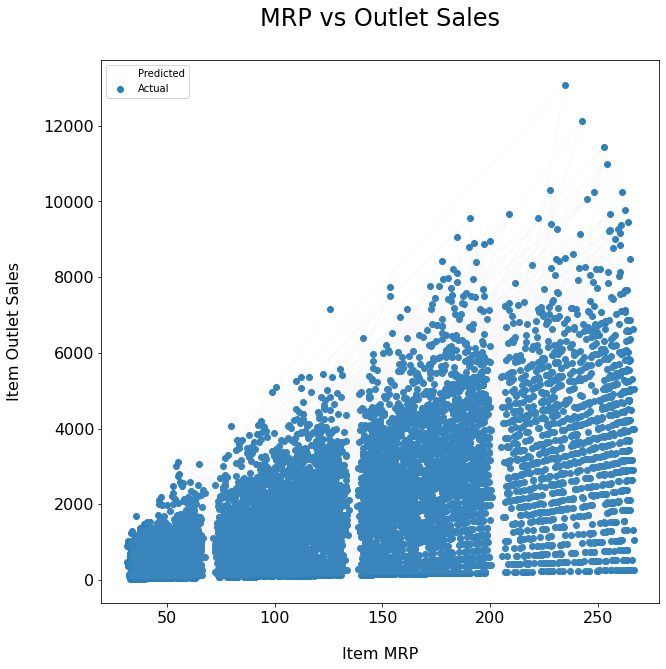

In [26]:
from IPython.core.pylabtools import figsize
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(10,10));
axes.scatter(df['Item_MRP'],df['Item_Outlet_Sales'], c='#2c7fb8',lw=1, label='Actual')
axes.plot(df['Item_MRP'],df['Item_Outlet_Sales'], c='#bcbddc',lw=1, alpha=.1, label='Predicted');
plt.title("MRP vs Outlet Sales\n", fontsize=24);

plt.legend(loc="upper left")
plt.xlabel('\nItem MRP', fontsize=16);
plt.ylabel('Item Outlet Sales\n', fontsize=16);
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# Interpretation: This scatter plot supports our findings from the heat mat above:
# Item MRP and Item Outlet Sales are positively correlated. There is a linear 
# relationship between the two: as MRP increases Outlet Sales also increase.  

#MACHINE LEARNING DATA PREPARATION 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')

# An immmutable copy fo the orginal Data Frame will be used for Machine Learning

df_ML.shape

# it has the same shape as the original set. 

(8523, 12)

In [28]:
df_ML.isna().sum()
print('\n\n')

df_ML.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [45]:
# Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column 
# as your target and the rest of the relevant variables as your features matrix.  
y= df_ML['Item_Outlet_Sales']
X= df_ML.drop(columns=['Item_Outlet_Sales'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [30]:
# Selectors 

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_selector(X_train)

 # Column Name			      Feature Type
 # Item Identifier		    nominal 
 # Item Fat Content		    ordinal
 # Item Type			        nominal
 # Outlet Identifier		  nominal
 # Outlet Size			      nominal
 # Outlet Location Type	  nominal	
 # Outlet Type			      nominal


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
df_ML['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [48]:
# Ordinal Encoder

fat_content_label = ['Regular', 'Low Fat']
outlet_size_label = ['Small', 'Medium', 'High']

ordered_labels = [fat_content_label, outlet_size_label]

ordered_labels

# Ordinal Enconder

Ordinal_Encoder = OrdinalEncoder(categories=ordered_labels)
Ordinal_Encoder

OrdinalEncoder(categories=[['Regular', 'Low Fat'], ['Small', 'Medium', 'High']])

In [33]:
# Scalars and OHE

# Numeric Scaler

Scaler_Num = StandardScaler()

# Ordinal Scaler

Scaler_Ord = StandardScaler()

# One Hot Encoder
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [34]:
# Instantiate Transformers

# Imputers

ordinal_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
freq_imputer= SimpleImputer(strategy='most_frequent')
mean_imputer= SimpleImputer(strategy='mean')

In [40]:
# Creating Pipelines

ordinal_PL = make_pipeline(freq_imputer, Ordinal_Encoder, Scaler_Ord)
nominal_PL = make_pipeline(freq_imputer, OHE)
numeric_PL = make_pipeline(mean_imputer, Scaler_Num)

In [41]:
# Creating Tuples for Pipeline Pairing 

# Columns

ordinal_columns = [df_ML['Item_Fat_Content'], df_ML['Outlet_Size']]
nominal_columns = [df_ML['Item_Identifier'], df_ML['Item_Type'], df_ML['Outlet_Identifier'], df_ML['Outlet_Size'], df_ML['Outlet_Location_Type'], df_ML['Outlet_Type']]

# Tuples

ordinal_tuple = (ordinal_PL, ordinal_columns)
nominal_tuple = (nominal_PL, nominal_columns)
numeric_tuple = (numeric_PL, num_selector)

In [50]:
# Column Transformer and fit on Training Data

preprocessor = make_column_transformer(ordinal_tuple, nominal_tuple, numeric_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Low '
                                                                              'Fat'],
                                                                             ['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 [0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Na...
3           Grocery Store
4       Supermarket Type1
              ...        
8518    Supermarket Type1
8519    Supermarket Type1
8520    Supermarket Type1
8521    Supermarket Type2
8522    Supermarket Type1
Name: Outlet_Type, Length: 8523, dtype: object]),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8b949f9950>)])